### **Objective:** 

The aim of this study is to use machine learning models to predict true and fake news.

### **Data analysis:**

Data analysis involves the following steps.

### **1. Data preprocessing.**

Data preprocessing involves the following steps.

1. Lowering the case of text data.
2. Removing URLs from test.
3. Removing extra spaces.
4. Removing punctuations.
5. Removing special characters.
6. Removing HTML tags.
7. Removing additional lines.
8. Lemmatizing the data and removing stopwords.
    
### **2. Exploratory data analysis.**

Exploratory data analysis is used to determine the following.

1. Which subject has more true/fake news?
2. What is the count of fake and true news.
3. Analysing wordcloud of true and fake news.
    
### **3. Feature extraction.**

Feature extracting is done using CountVectorizer and TfidfTransformer.

### **4. Model building.**

Following models were built to classify true and fake news.

1. Logistic regression.
2. Support vector machine.
3. Naive Bayes classifier.
4. K-Nearest neighbor.
5. Random forests.

In [1]:
# Importing following libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import nltk, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
import time
import en_core_web_sm, nltk, string, re
from bs4 import BeautifulSoup
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Load the data.

true_news = pd.read_csv("True.csv")

fake_news = pd.read_csv("Fake.csv")

In [3]:
# Examine the data.

true_news.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
# Examine the data.

fake_news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
# Examine the data.

true_news.shape

(21417, 4)

In [6]:
# Examine the data.

fake_news.shape

(23481, 4)

In [7]:
# Examine the data.

print(true_news.dtypes)

print("-" * 20)

print(fake_news.dtypes)

title      object
text       object
subject    object
date       object
dtype: object
--------------------
title      object
text       object
subject    object
date       object
dtype: object


In [8]:
# Examine the data.

print(true_news.isnull().sum())

print("-" * 20)

print(fake_news.isnull().sum())

# There are no missing values.

title      0
text       0
subject    0
date       0
dtype: int64
--------------------
title      0
text       0
subject    0
date       0
dtype: int64


In [9]:
# Specifying fake and real in column "target".

true_news['target'] = 'true'

fake_news['target'] = 'fake'

In [10]:
# Examine the data.

print(true_news.head())

print("-" * 80)

print(fake_news.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date target  
0  December 31, 2017    true  
1  December 29, 2017    true  
2  December 31, 2017    true  
3  December 30, 2017    true  
4  December 29, 2017    true  
--------------------------------------------------------

In [11]:
# Combining "true_news" dataset and "fake_news" dataset.

news = pd.concat([fake_news, true_news]).reset_index(drop = True)

news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date target  
0  December 31, 2017   fake  
1  December 31, 2017   fake  
2  December 30, 2017   fake  
3  December 29, 2017   fake  
4  December 25, 2017   fake

### **Data Preprocessing**

In [12]:
# Cleaning the data.

nltk.download('punkt')

nltk.download('stopwords')

nltk.download('wordnet')

start_time = time.time()

stop = set(stopwords.words('english'))

lemmatizer = nltk.stem.WordNetLemmatizer()

wordTokenizer = nltk.tokenize.WhitespaceTokenizer()

def Preprocessing(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(' +',' ',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', str(text))
    text = BeautifulSoup(text,  features = "lxml").text 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = ' '.join([lemmatizer.lemmatize(w) for w in wordTokenizer.tokenize(text) if (w not in stop)])
    # text = ' '.join([token.lemma_ for token in list(nlp(text)) if (token.is_stop == False)])
    return text

news['cleanText'] = news['text'].apply(lambda x:Preprocessing(x))

print(f"{(time.time() - start_time):0.3f} seconds to execute preprocessing pipeline")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
105.439 seconds to execute preprocessing pipeline


In [13]:
# View "news" dataframe.

news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date target                                          cleanText  
0  December 31, 2017   fake  donald trump wish american happy new year leav...  
1  December 31, 2017   fake  house intelligence committee chairman devin nu...  
2  December 30, 2017   fake  friday revealed former milwaukee sheriff david...  
3  December 29, 2017   fake  christmas day donald trump announced would bac...  
4  December 25, 2017   fake  pope francis used annual christmas day message...

### **Exploratory Data Analysis**

Text(0.5, 1.0, 'target variable count')

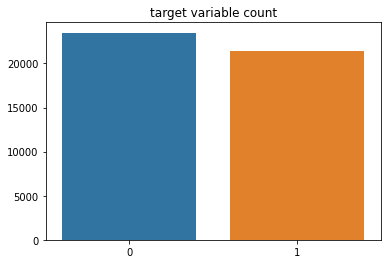

In [14]:
# Determining the frequency of true news and fake news.

count = news['target'].value_counts().values

sns.barplot(x = [0, 1], y = count)

plt.title('target variable count')

# Data has more number of fake news than true news.

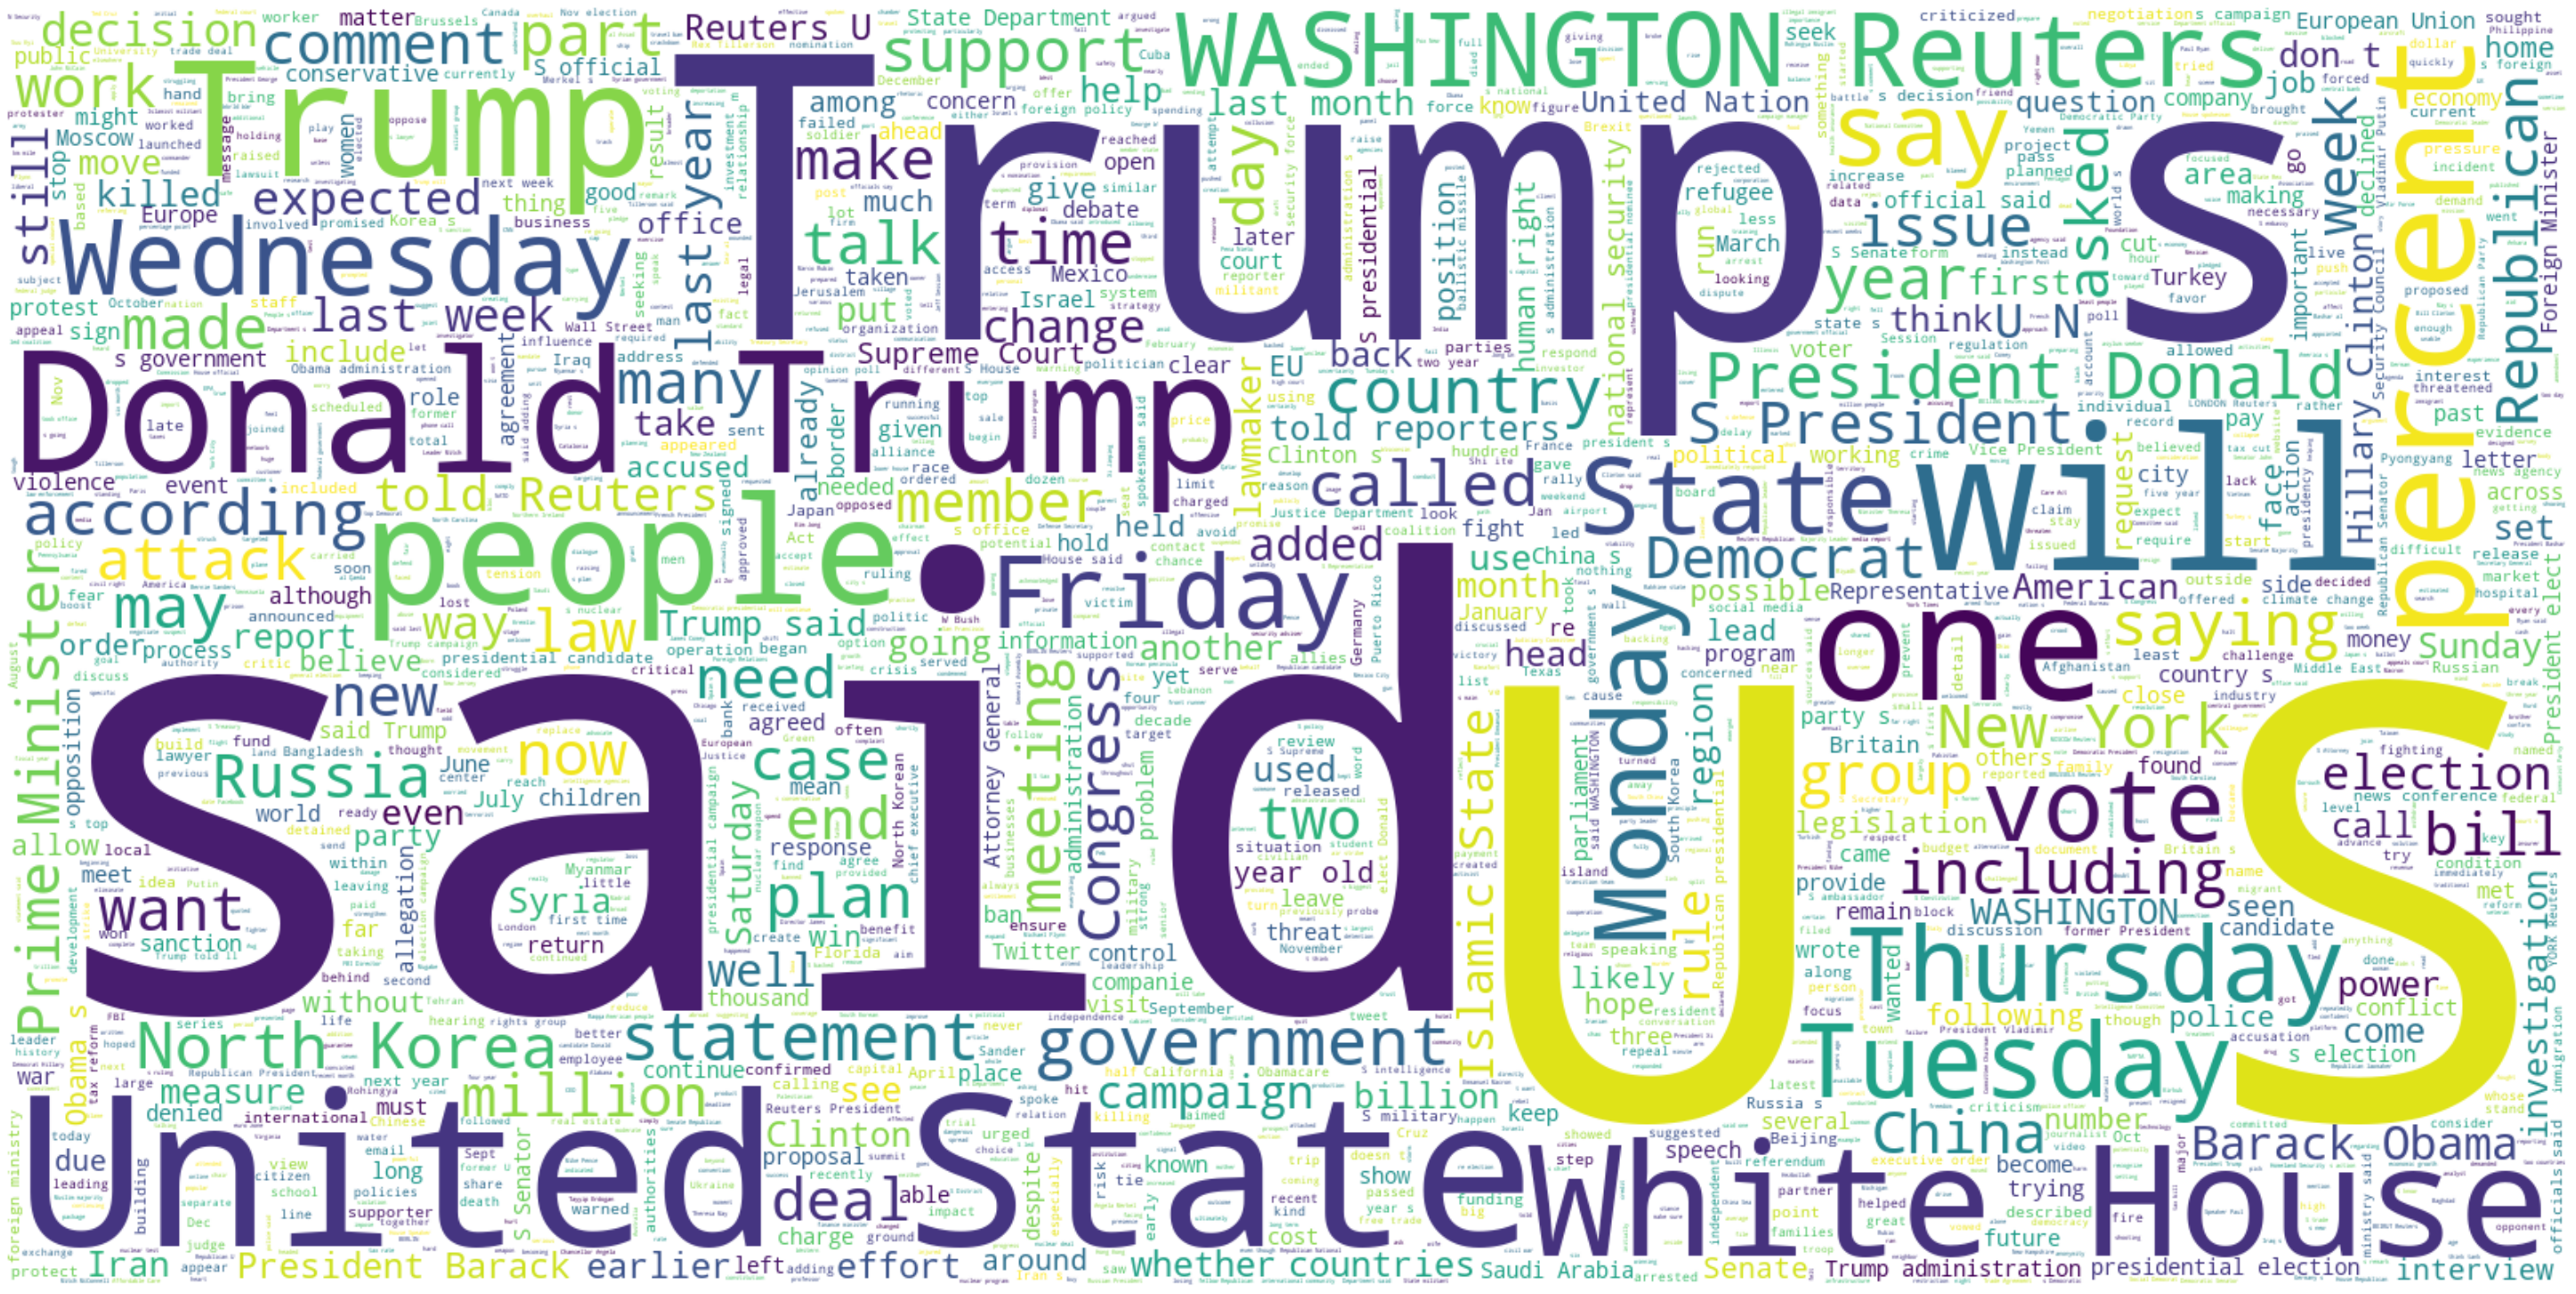

In [15]:
# Wordcloud for true news.

cloud = WordCloud(max_words = 1800, 
                  width = 1600, 
                  height = 800,
                  background_color = "white").generate(" ".join(news[news['target'] == "true"].text))

plt.figure(figsize = (40, 30))

plt.imshow(cloud, interpolation = "bilinear")

plt.axis("off")

plt.tight_layout(pad = 0)

plt.show()

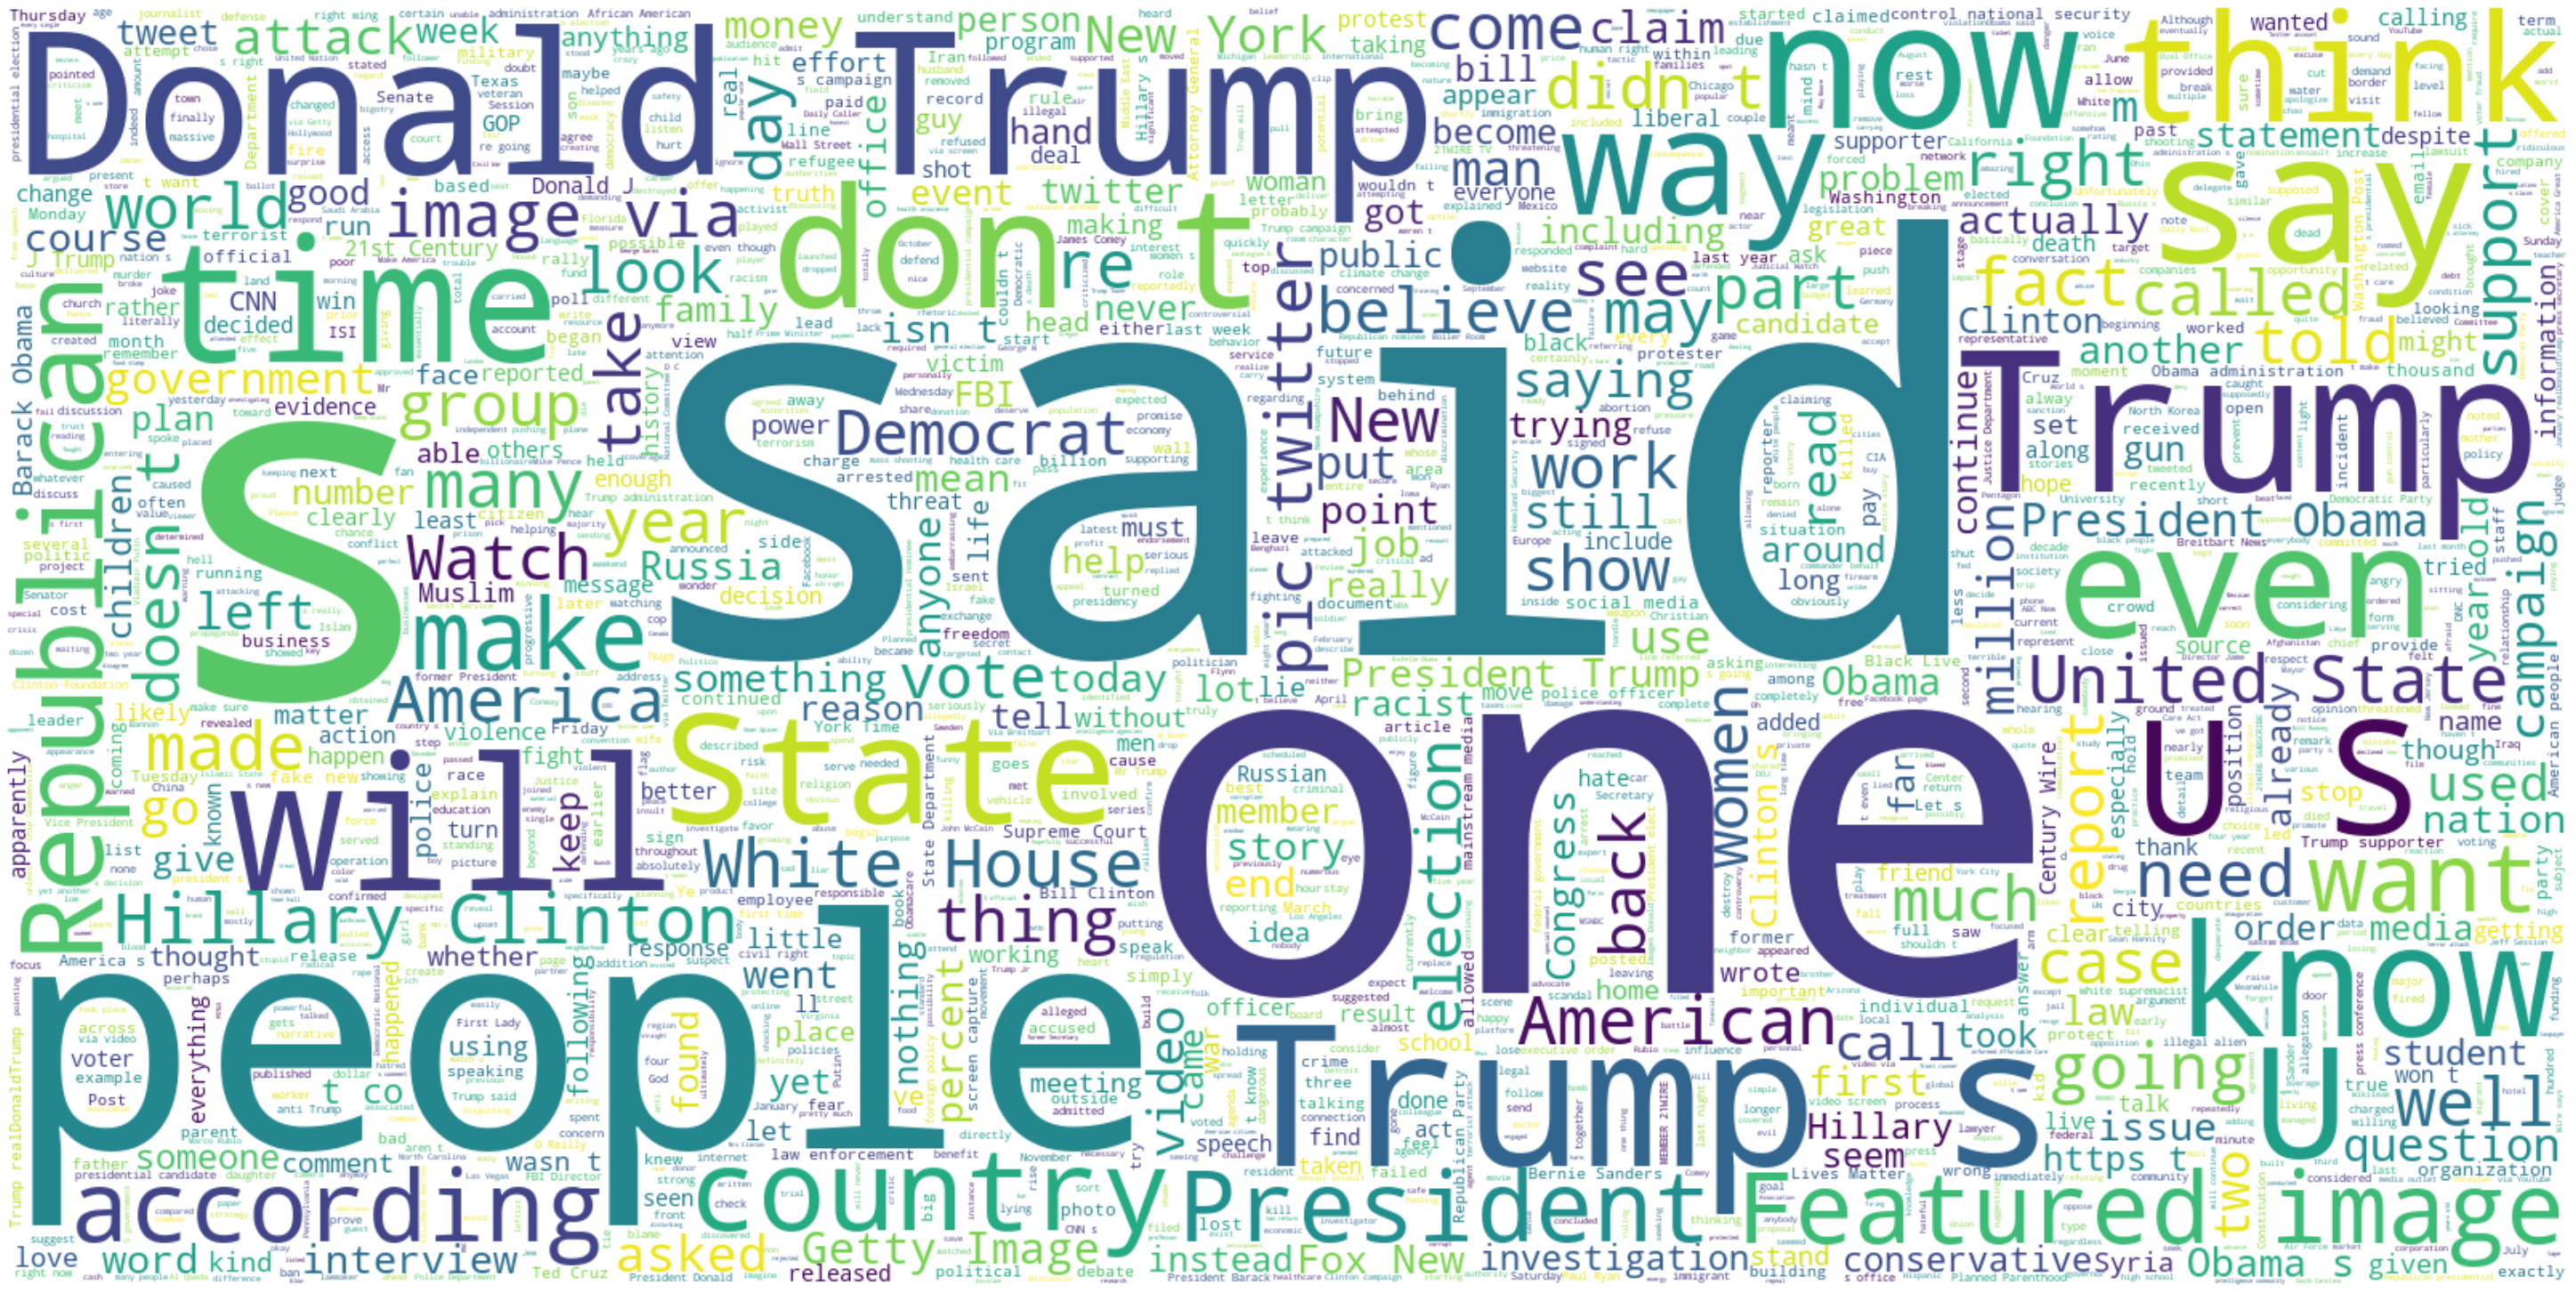

In [16]:
# Wordcloud for fake news.

cloud = WordCloud(max_words = 1800, 
                  width = 1600, 
                  height = 800,
                  background_color = "white").generate(" ".join(news[news['target'] == "fake"].text))

plt.figure(figsize = (40, 30))

plt.imshow(cloud, interpolation = "bilinear")

plt.axis("off")

plt.tight_layout(pad = 0)

plt.show()

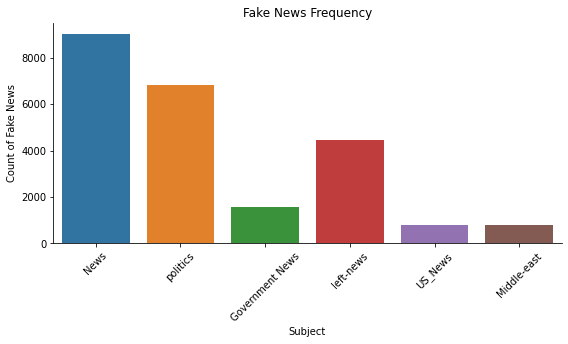

In [17]:
# Checking subject that contains fake news.

g = sns.catplot(x = "subject", col = "target", data = fake_news, kind = "count", height = 4, aspect = 2)

g.set(xlabel = 'Subject', ylabel = 'Count of Fake News',title = 'Fake News Frequency')

g.set_xticklabels(rotation = 45)

# Fake News are present in every subject of the news.

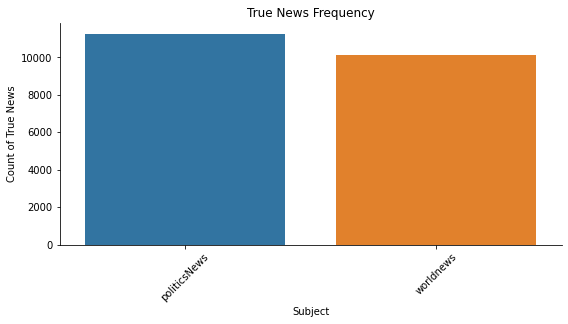

In [18]:
# Checking subject that contains true news.

g = sns.catplot(x = "subject", col = "target", data = true_news, kind = "count", height = 4, aspect = 2)

g.set(xlabel = 'Subject', ylabel = 'Count of True News',title = 'True News Frequency')

g.set_xticklabels(rotation = 45)

# True news are only present in Political news and World news. 

## **Model building**

### **Logistic Regression**

In [19]:
# Splitting data into train and test data.

X_train,X_test,y_train,y_test = train_test_split(news['cleanText'], news.target, test_size = 0.2, random_state = 100)

In [20]:
# Fake news detection using Logistic regression.

pipe1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression())])

model_lr = pipe1.fit(X_train, y_train)

lr_pred = model_lr.predict(X_test)

In [21]:
# Test the model on test data.

lr_pred = model_lr.predict(X_test)

print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy_score(y_test, lr_pred)*100,2)))

print("\nConfusion Matrix of Logistic Regression Classifier:\n")
print(confusion_matrix(y_test, lr_pred))

print("\nCLassification Report of Logistic Regression Classifier:\n")
print(classification_report(y_test, lr_pred))

Accuracy of Logistic Regression Classifier: 98.56%

Confusion Matrix of Logistic Regression Classifier:

[[4596   71]
 [  58 4255]]

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

        fake       0.99      0.98      0.99      4667
        true       0.98      0.99      0.99      4313

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### **Support vector machine**

In [22]:
# Fake news detection using support vector machine.

pipe2 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LinearSVC())])

model_svc = pipe2.fit(X_train, y_train)

In [23]:
# Test the model on test data.

svc_pred = model_svc.predict(X_test)

print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, svc_pred)*100,2)))

print("\nConfusion Matrix of SVM Classifier:\n")
print(confusion_matrix(y_test, svc_pred))

print("\nClassification Report of SVM Classifier:\n")
print(classification_report(y_test, svc_pred))

Accuracy of SVM Classifier: 99.43%

Confusion Matrix of SVM Classifier:

[[4648   19]
 [  32 4281]]

Classification Report of SVM Classifier:

              precision    recall  f1-score   support

        fake       0.99      1.00      0.99      4667
        true       1.00      0.99      0.99      4313

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### **Naive Bayes Classifier**

In [24]:
# Fake news detection using Naive Bayes Classifier.

pipe3 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

model_nb = pipe3.fit(X_train, y_train)

In [25]:
# Test the model on test data.

nb_pred = model_nb.predict(X_test)

print("Accuracy of Naive Bayes Classifier: {}%".format(round(accuracy_score(y_test, nb_pred)*100,2)))

print("\nConfusion Matrix of Naive Bayes Classifier:\n")
print(confusion_matrix(y_test, nb_pred))

print("\nClassification Report of Naive Bayes Classifier:\n")
print(classification_report(y_test, nb_pred))

Accuracy of Naive Bayes Classifier: 93.41%

Confusion Matrix of Naive Bayes Classifier:

[[4358  309]
 [ 283 4030]]

Classification Report of Naive Bayes Classifier:

              precision    recall  f1-score   support

        fake       0.94      0.93      0.94      4667
        true       0.93      0.93      0.93      4313

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



### **K-Nearest Neighbor Classifier**

In [26]:
# Fake news detection using K-Nearest Neighbor Classifier.

pipe4 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', KNeighborsClassifier())])

model_knn = pipe4.fit(X_train, y_train)

In [27]:
# Test the model on test data.

knn_pred = model_knn.predict(X_test)

print("Accuracy of K-Nearest Neighbor Classifier: {}%".format(round(accuracy_score(y_test, knn_pred)*100,2)))

print("\nConfusion Matrix of K-Nearest Neighbor Classifier:\n")
print(confusion_matrix(y_test, knn_pred))

print("\nClassification Report of K-Nearest Neighbor Classifier:\n")
print(classification_report(y_test, knn_pred))

Accuracy of K-Nearest Neighbor Classifier: 65.28%

Confusion Matrix of K-Nearest Neighbor Classifier:

[[4608   59]
 [3059 1254]]

Classification Report of K-Nearest Neighbor Classifier:

              precision    recall  f1-score   support

        fake       0.60      0.99      0.75      4667
        true       0.96      0.29      0.45      4313

    accuracy                           0.65      8980
   macro avg       0.78      0.64      0.60      8980
weighted avg       0.77      0.65      0.60      8980



### **Random Forest Classifier**

In [28]:
# Fake news detection using Random Forest Classifier.

pipe5 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', RandomForestClassifier(criterion = "entropy"))])

model_rf = pipe5.fit(X_train, y_train)

In [29]:
# Test the model on test data.

rf_pred = model_rf.predict(X_test)

print("Accuracy of Random Forest Classifierr: {}%".format(round(accuracy_score(y_test, rf_pred)*100,2)))

print("\nConfusion Matrix of Random Forest Classifier:\n")
print(confusion_matrix(y_test, rf_pred))

print("\nClassification Report of Random Forest Classifier:\n")
print(classification_report(y_test, rf_pred))

Accuracy of Random Forest Classifierr: 98.59%

Confusion Matrix of Random Forest Classifier:

[[4597   70]
 [  57 4256]]

Classification Report of Random Forest Classifier:

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4667
        true       0.98      0.99      0.99      4313

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### SVM is performing best with highest accuracy of 99.43%.

### Getting top 20 features identified by SVM model.

In [30]:
# Get the name of each feature.

feature_names = model_svc.named_steps["vect"].get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
# Get the coefficient of each feature.

coefs = model_svc.named_steps["model"].coef_.flatten()

In [32]:
# Zip coefficients and names together and make a DataFrame.

zipped = zip(feature_names, coefs)

df = pd.DataFrame(zipped, columns=["feature", "value"])

# Sort the features by the absolute value of their coefficient.

df["abs_value"] = df["value"].apply(lambda x: abs(x))

df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")

df = df.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

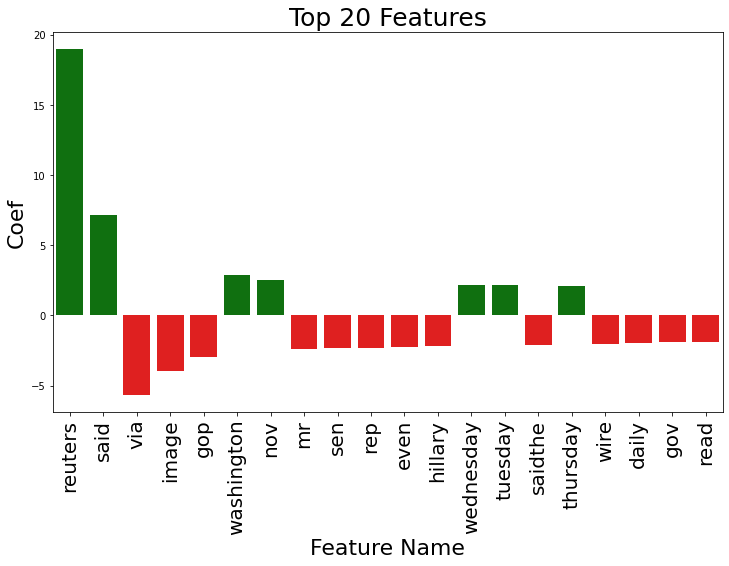

In [33]:
# Plot top 20 features.

fig, ax = plt.subplots(1, 1, figsize = (12, 7))

sns.barplot(x = "feature", y = "value", data = df.head(20), palette = df.head(20)["colors"])

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 20)

ax.set_title("Top 20 Features", fontsize = 25)

ax.set_ylabel("Coef", fontsize = 22)

ax.set_xlabel("Feature Name", fontsize = 22)

# Negative unigrams seem to be the most impactful.

### **Conclusions:**

Five models as Logistic regression, Support vector machine, Naive Bayes model, K-Nearest neighbour and Random forest models were used for fake news prediction. The results from these models are as below.

| Model | Accuracy (%) | Sensitivity (%) |
| --- | --- | --- |
| Logistic regression | 98.56 | 99 |
| Support vector machine | 99.43 | 99|
| Naive Bayes | 93.41 | 93 |
| K-Nearest Neighbor | 65.28 | 29|
| Random forests | 98.41 | 98 |

Out of the five models, Support vector machine is performing well with an accuracy of 99.43% and sensitivity of 99%. Hence Support vector machine can be best utilised for fake news prediction.